In [1]:
from utils.utils_dq import * 
%matplotlib inline

In [2]:
def plot_representation(names,env) :
    # Plot the different representation of the states, given by names
    titles = ['State : ' + str(x) for x in names]
    represented_tables = get_representation(names,env)

    n = len(represented_tables)

    if n == 1 :
        f, axs = plt.subplots(1,1,figsize=(8,6))
        axs = np.array([[axs]])
    else :
        f, axs = plt.subplots(1,n,figsize=(20,10))
        axs = axs.reshape( -1,1)

    for i in range(n) :
        axs[i][0].imshow(represented_tables[i])
        axs[i][0].set_xlabel('New representation')
        axs[i][0].set_ylabel('States')
        axs[i][0].set_title(titles[i])

    plt.show()

### Load the environment and results from q learning algorithm

In [3]:
# Load the environment 
with open('./check/env.pickle', 'rb') as f:
    env = pickle.load(f)


In [4]:
# Load the q_tables for gamma = 0 and gamma = 0.9
with open('./check/q_tables_q_learning_0.pickle', 'rb') as f:
    [q_table_q,q_table_q1] = pickle.load(f)

with open('./check/q_tables_q_learning_09.pickle', 'rb') as f:
    [q_table_q09,q_table_q109] = pickle.load(f)
    
with open('./check/q_learning_rewards_0.pickle', 'rb') as f:
    [all_reward_q0,all_reward_q10] = pickle.load(f)
    
with open('./check/q_learning_rewards_09.pickle', 'rb') as f:
    [all_reward_q09,all_reward_q109] = pickle.load(f)
    
    


In [5]:
tables_q_learning = [q_table_q,q_table_q1,q_table_q09,q_table_q109]

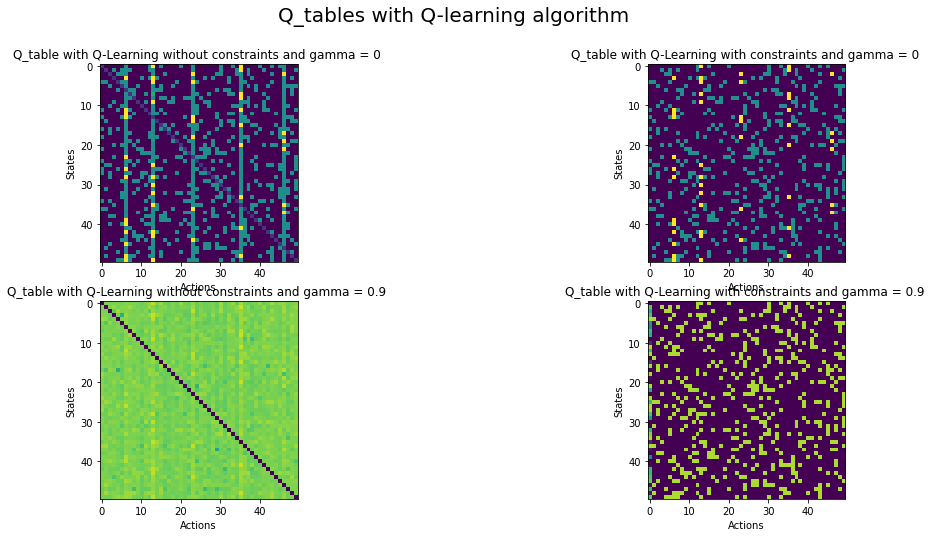

In [6]:
names = ['Q_table with Q-Learning without constraints and gamma = 0 ',\
         'Q_table with Q-Learning with constraints and gamma = 0 ' ,\
        'Q_table with Q-Learning without constraints and gamma = 0.9 ',\
         'Q_table with Q-Learning with constraints and gamma = 0.9 ' ]

f, axs = plt.subplots(2,2,figsize=(18,8))
axs = axs.reshape(-1,1)
    
for i in range(len(axs)) : 

    axs[i][0].imshow(tables_q_learning[i],cmap='viridis', vmin=0, vmax=2)
    axs[i][0].set_xlabel('Actions')
    axs[i][0].set_ylabel('States')
    axs[i][0].set_title(names[i])
        
        

plt.suptitle('Q_tables with Q-learning algorithm ', size=20)    
        
plt.show()

## Reward matrix

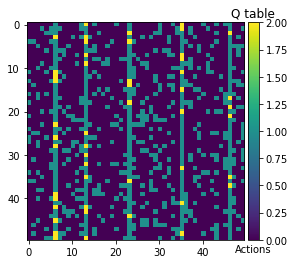

In [7]:
plot_q_table(get_matrix_rewards(env))

## Rewards with Q learning algorithm

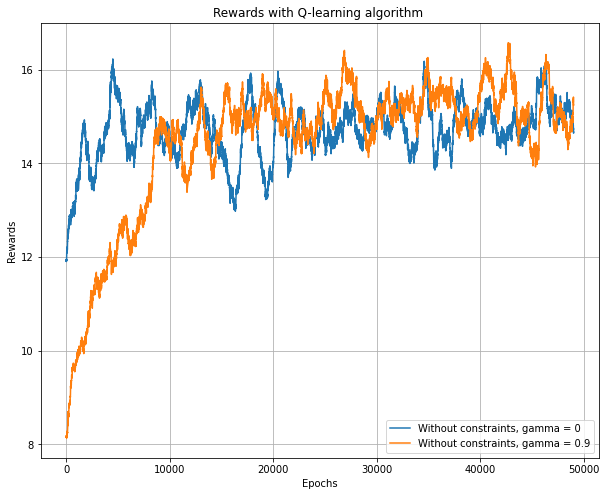

In [8]:
f, axs = plt.subplots(1,1,figsize=(10,8))

# plt.plot( running_mean(all_reward_q0,1000), label ='With constraints, gamma = 0' )
plt.plot( running_mean(all_reward_q10,1000) , label ='Without constraints, gamma = 0')
# plt.plot( running_mean(all_reward_q09,1000), label ='With constraints, gamma = 0.9 ' )
plt.plot( running_mean(all_reward_q109,1000) , label ='Without constraints, gamma = 0.9')

plt.xlabel('Epochs')
plt.ylabel('Rewards')
plt.title('Rewards with Q-learning algorithm ')
plt.legend()
plt.grid(True)
plt.show()


# Deep Q learning : Results 

## State representation

### 1. One hot encoding

$$\LARGE  \Phi(S_t = i ) = [ 0, ... , 1, ... 0         ] $$

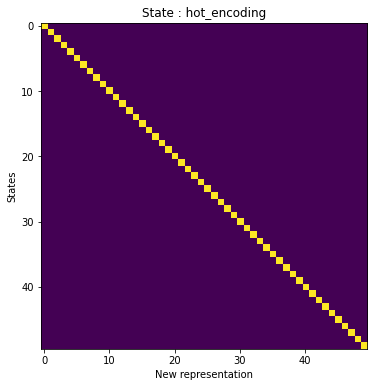

In [9]:
plot_representation(['hot_encoding'],env)

### 2. U matrix

#### 2.1. Full U matrix

$$ \LARGE \Phi(S_t = i ) = u_i $$

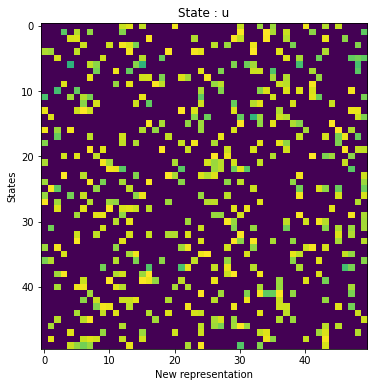

In [10]:
plot_representation(['u'],env)

#### 2.2. Hot encoded U matrix

$$ \LARGE \Phi(S_t = i ) = (\delta_{i,j})_{1 \le j \le n  } \text{ where } \delta_{i,j}
\begin{cases}
    1& \text{if } u_{i,j} \ne 0   \\
    0             & \text{otherwise}
\end{cases} $$

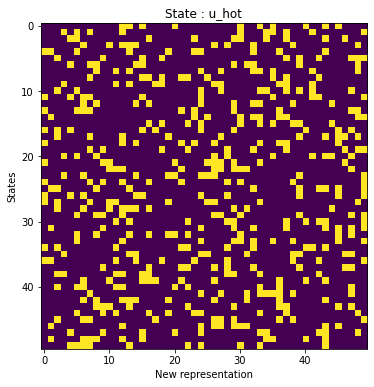

In [11]:
plot_representation(['u_hot'],env)

### 3. Rewards 

$$ \Large \Phi(S_t = i ) = (\delta_{i,j})_{1 \le j \le n  } \text{ where } \delta_{i,j} 
\begin{cases}
    2& \text{if j is cached and related}   \\
    1 & \text{if j is cached and not related or related and not cached} \\
    0 & \text{otherwise} 
\end{cases}  $$

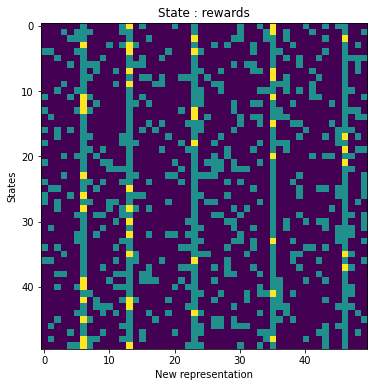

In [12]:
plot_representation(['rewards'],env)

### 4. Valuable

$S_t = i$ by $\delta_{i,j}$ where : 

   
- $\delta_{i,j}$ = 0 if $u_{i,j} = 0, x_j = 1, \forall k \in [1,K], u_{j,k} \ne 0 \land x_k = 1   $
- $\delta_{i,j} \mathrel{+}=  1$ if $u_{i,j} \ne 0$
- $\delta_{i,j} \mathrel{+}= 1$ if $x_j = 0$
- $\delta_{i,j} \mathrel{+}= 1$ if $\exists k \in [1,K], u_{j,k} \ne 0 \land x_k = 0 $




In other words, we replace the state by actions where we add 1 whenever the action is either cached, related, or if the next state it leads to has at least one related content that is cached.

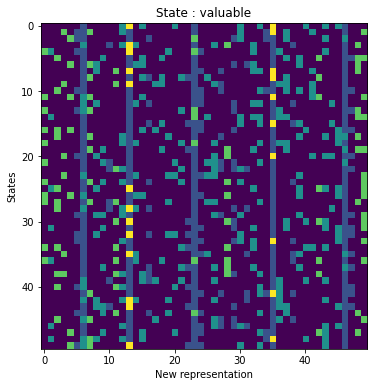

In [13]:
plot_representation(['valuable'],env)

## Summary 

In [14]:
names = ['hot_encoding','u','u_hot','rewards','valuable']

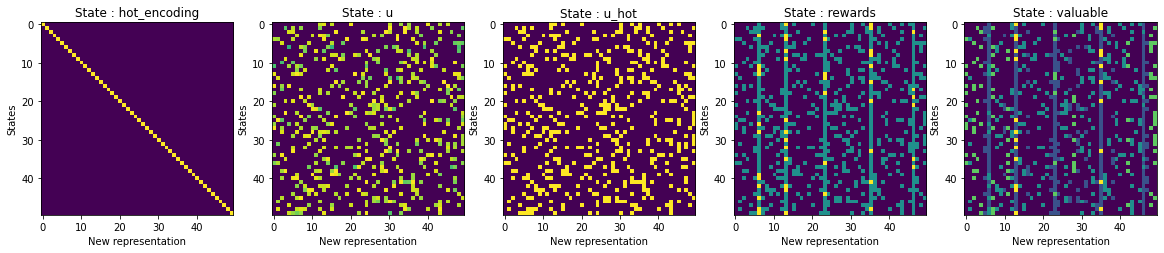

In [15]:
plot_representation(names,env)

## 1. Linear Model with gamma = 0

In [16]:
# Parameters for the deep Q learning algorithm
param_deep_Q = {
    'env' : env,\
    'state_dim' : None ,\
    'name_conversion_state' : None,\
    'mem_size': 50,\
    'gamma' : 0 ,\
    'epsilon' : 0.1,\
    'learning_rate' : 5e-3,\
    'max_iter' : 10 , \
    'batch_size' : 10 ,
    'name' : 'test_model',\
    'model' : LinearModel(1,CATALOGUE_SIZE),\
    'constraints' : False,
    'optimizer' : 'SGD'
}


In [17]:
# Load the results 
with open('./check/linear_gamma_0.pickle', 'rb') as f:
    linear_gamma_0 = pickle.load(f)


In [18]:
param_plot = {
    'dic' : linear_gamma_0,
    'names' : ['hot_encoding','u_hot','valuable','rewards'],
    "rm_rew" : 500, 
    'rm_loss' : 500,
    'gamma' : 0,
    'q_learn' : running_mean(all_reward_q10,500)[:10000]
}


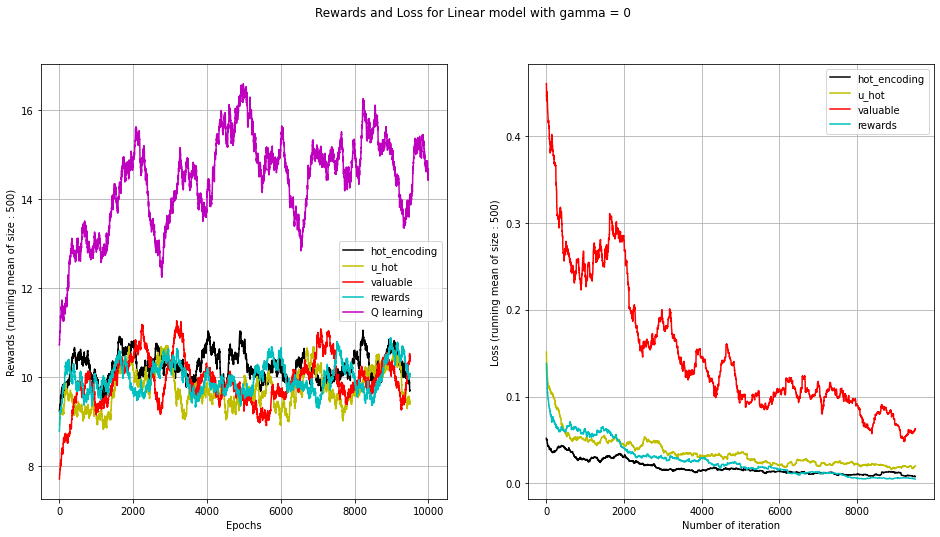

In [20]:
plot_results_loss_rew_dic(**param_plot)

In [21]:
param_q_table = {
     'dic' : linear_gamma_0,
    "names" : ['hot_encoding','u_hot','valuable','rewards'],
    "gamma" : 0 ,
    'isLinear' : True,
    "tranpose" : True
}

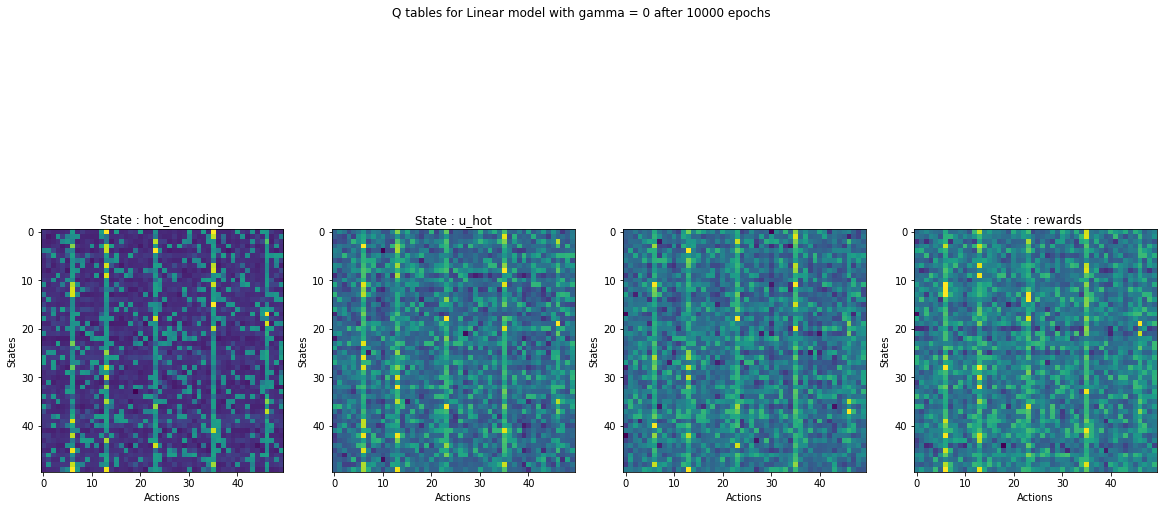

In [22]:
compare_q_tables_dic(**param_q_table) 

## 2. Linear Model with gamma = 0.9

In [23]:
# Parameters for the deep Q learning algorithm
param_deep_Q = {
    'env' : env,\
    'state_dim' : None ,\
    'name_conversion_state' : None,\
    'mem_size': 50,\
    'gamma' : 0 ,\
    'epsilon' : 0.1,\
    'learning_rate' : 1e-4,\
    'max_iter' : 10 , \
    'batch_size' : 10 ,
    'name' : 'test_model',\
    'model' : LinearModel(1,CATALOGUE_SIZE),\
    'constraints' : False,
    'optimizer' : 'SGD'
}


In [24]:
# Load the results 
with open('./check/dict_results_linear_09.pickle', 'rb') as f:
    linear_gamma_09 = pickle.load(f)


In [25]:
param_plot = {
    'dic' : linear_gamma_09,
    'names' : ['hot_encoding','u_hot','valuable','rewards'],
    "rm_rew" : 500, 
    'rm_loss' : 500,
    'gamma' : 0.9,
    'q_learn' : running_mean(all_reward_q109,500)[:5000]
}


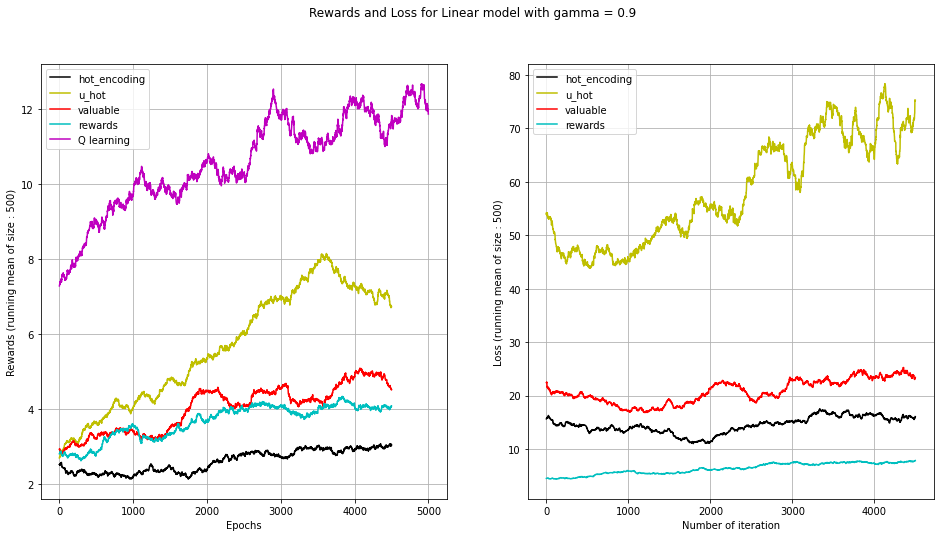

In [26]:
plot_results_loss_rew_dic(**param_plot)

In [27]:
param_q_table = {
     'dic' : linear_gamma_09,
    "names" : ['hot_encoding','u_hot','valuable','rewards'],
    "gamma" : 0.9 ,
    'isLinear' : True,
    "tranpose" : True
}

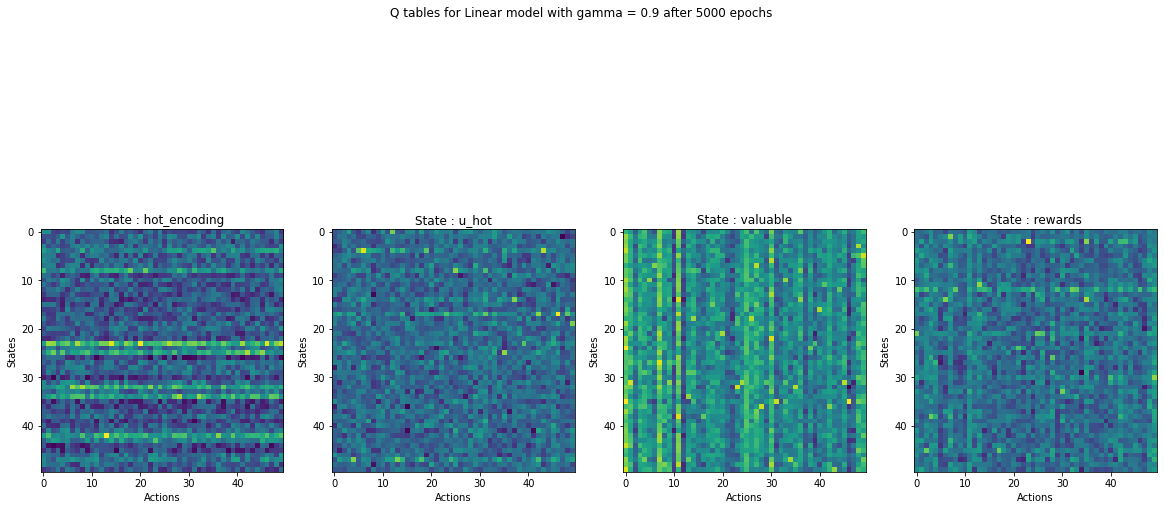

In [28]:
compare_q_tables_dic(**param_q_table) 

# 3. Fully connected model with gamma = 0 

In [29]:
# Parameters for the deep Q learning algorithm
param_deep_Q = {
    'env' : env,\
    'state_dim' : None ,\
    'name_conversion_state' : None,\
    'mem_size': 50,\
    'gamma' : 0 ,\
    'epsilon' : 0.1,\
    'learning_rate' : 5e-4,\
    'max_iter' : 10 , \
    'batch_size' : 10 ,
    'name' : 'test_model',\
    'model' : None,\
    'constraints' : False,
    'optimizer' : 'Adam'
}


In [30]:
with open('./check/dict_results_fc.pickle', 'rb') as f:
    dict_results_fc = pickle.load(f)

In [31]:
param_plot = {
    'dic' : dict_results_fc,
    'names' : ['hot_encoding','u_hot','valuable','rewards'],
    "rm_rew" : 500, 
    'rm_loss' : 500,
    'gamma' : 0,
    'q_learn' : running_mean(all_reward_q10,500)[:10000]
}


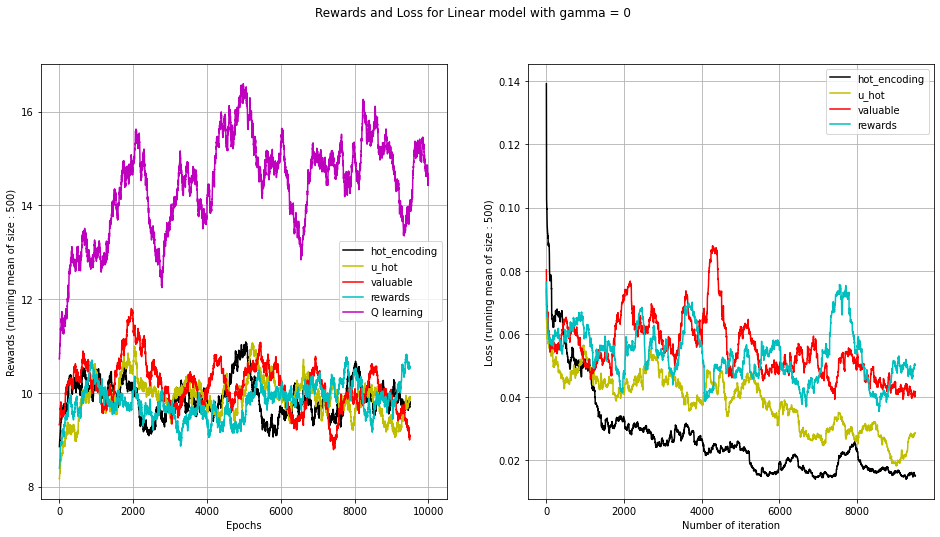

In [32]:
plot_results_loss_rew_dic(**param_plot)

In [33]:
param_q_table = {
     'dic' : dict_results_fc,
    "names" : ['hot_encoding','u_hot','valuable','rewards'],
    "gamma" : 0 ,
    'isLinear' : False,
    "tranpose" : True
}

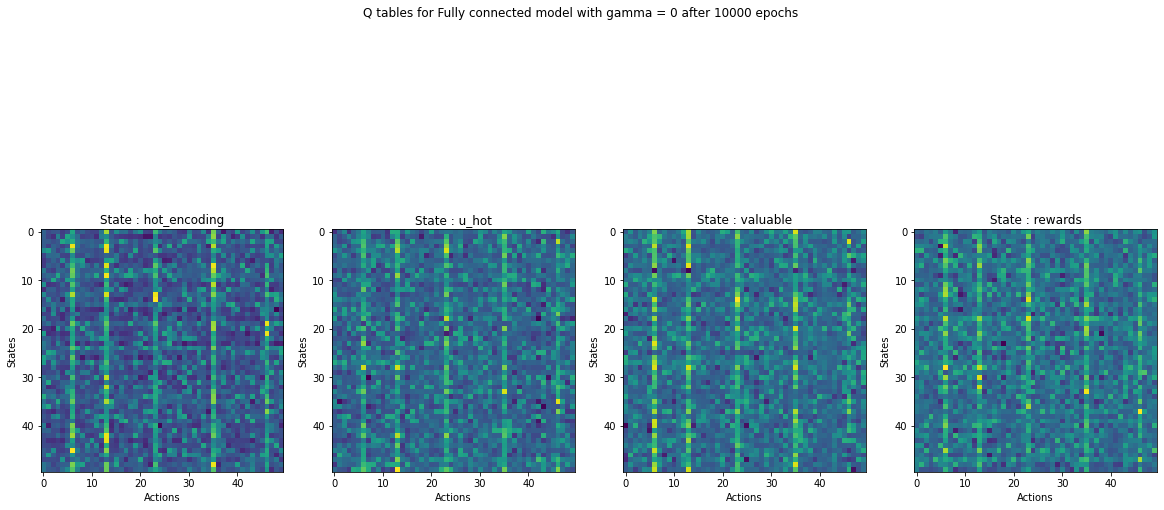

In [34]:
compare_q_tables_dic(**param_q_table) 

## 4. Fully connected Model with gamma = 0.9

In [35]:
# Parameters for the deep Q learning algorithm
param_deep_Q = {
    'env' : env,\
    'state_dim' : None ,\
    'name_conversion_state' : None,\
    'mem_size': 200,\
    'gamma' : 0.9 ,\
    'epsilon' : 0.4,\
    'learning_rate' : 1e-5,\
    'max_iter' : 10 , \
    'batch_size' : 20 ,
    'name' : 'test_model',\
    'model' : None,\
    'constraints' : False,
    'optimizer' : 'Adam'
}


In [36]:
with open('./check/dict_results_fc_09_adam.pickle', 'rb') as f:
    dict_results_fc_09_adam = pickle.load(f)

In [37]:
param_plot = {
    'dic' : dict_results_fc_09_adam,
    'names' : ['hot_encoding','u_hot','valuable','rewards'],
    "rm_rew" : 500, 
    'rm_loss' : 500,
    'gamma' : 0.9,
    'q_learn' : running_mean(all_reward_q109,500)[:5000]
}


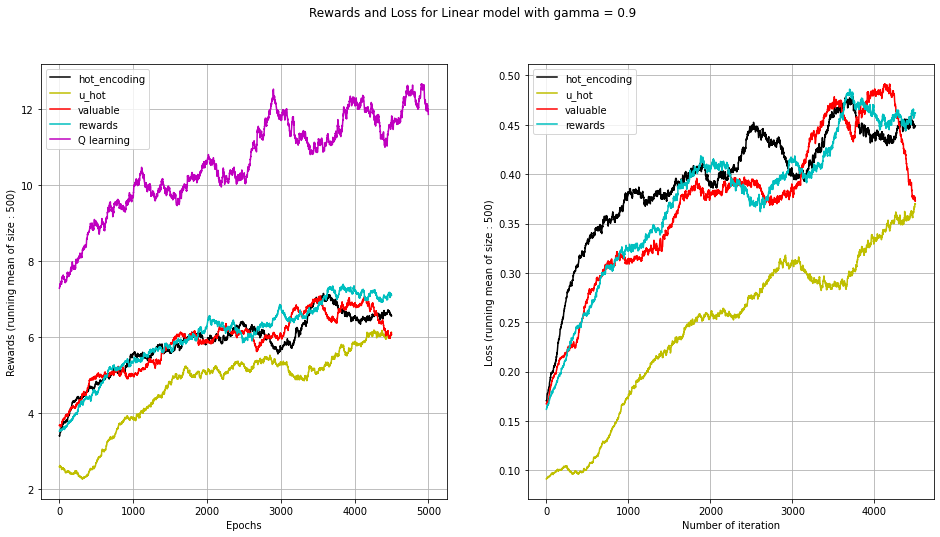

In [38]:
plot_results_loss_rew_dic(**param_plot)

In [39]:
param_q_table = {
     'dic' : dict_results_fc_09_adam,
    "names" : ['hot_encoding','u_hot','valuable','rewards'],
    "gamma" : 0.9 ,
    'isLinear' : False,
    "tranpose" : True
}

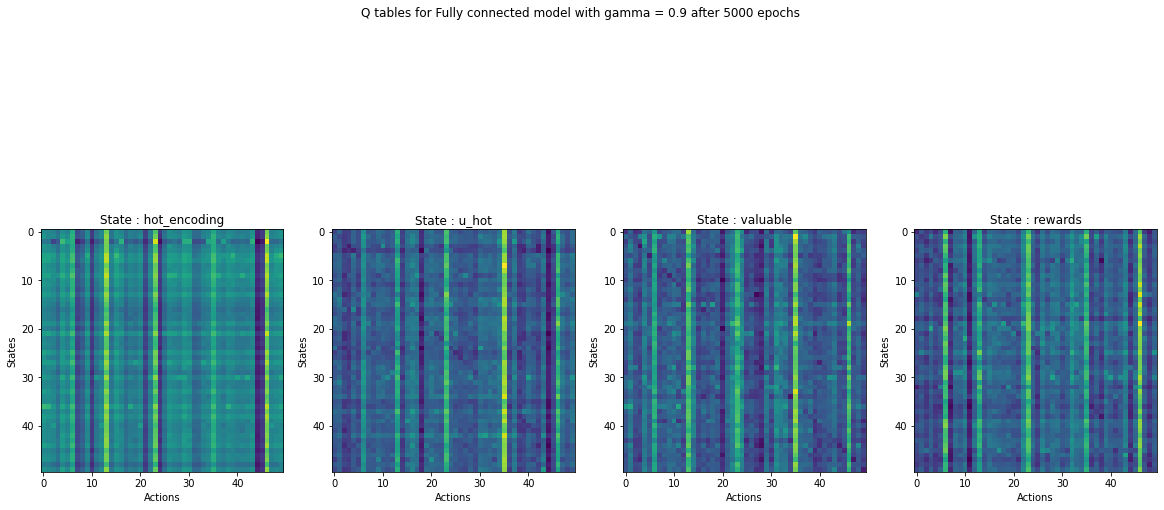

In [40]:
compare_q_tables_dic(**param_q_table) 

# Double Q learning 

## State representation

### 1. Multiple

$$ \Large \Phi(S_t = i ) = (\delta_{i,j})_{1 \le j \le n  } \text{ where } \delta_{i,j} = (a,b,c) : $$ 
- a = 0 if not cached not related, 1 otherwise
- b = 1 if the action is related, 0 otherwise
- c = 1 if the action is cached, 0 otherwise


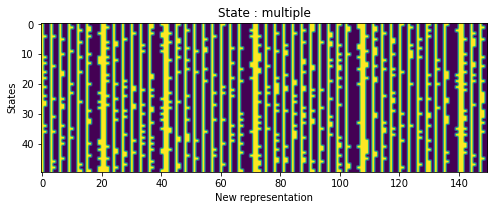

In [42]:
plot_representation(['multiple'],env)

### 2. Multiple valuable

$$ \Large \Phi(S_t = i ) = (\delta_{i,j})_{1 \le j \le n  } \text{ where } \delta_{i,j} = (a,b,c,d) : $$ 
- a = 0 if not cached not related, 1 otherwise
- b = 1 if the action is related, 0 otherwise
- c = 1 if the action is cached, 0 otherwise
- d is incremented each time the next action has related contents cached

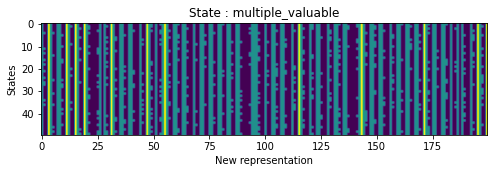

In [43]:
plot_representation(['multiple_valuable'],env)

### Summary 

In [44]:
names = ['multiple', 'multiple_valuable']

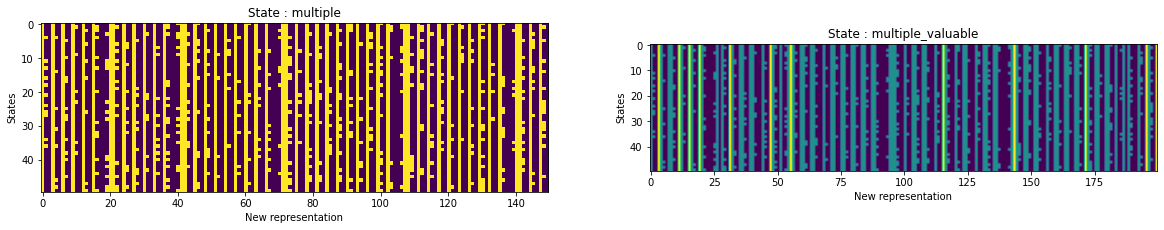

In [45]:
plot_representation(names,env)

## Target network : Compare the effect of the update 

In [46]:
# Parameters for the deep Q learning algorithm
name = names[0]

param_deep_Q = {
    'env' : env,\
    'state_dim' : dict_conversion[name] ,\
    'name_conversion_state' : name,\
    'mem_size': 100,\
    'gamma' : 0 ,\
    'epsilon' : 0.1,\
    'learning_rate' : 1e-3,\
    'max_iter' : 10000 , \
    'batch_size' : 10 ,
    'name' : 'test_model',\
    'model' : Model(dict_conversion[name], CATALOGUE_SIZE),\
    'constraints' : False,
    'optimizer' : 'SGD',
    'update_target' : 50
}

times = [1,10,100]
dic_time = {}

In [47]:
# get_time_update(dic_time, name, times, param_deep_Q)

In [48]:
with open('./check/dic_time_dq.pickle', 'rb') as f:
    dic_time = pickle.load(f)

In [49]:
param_time ={
    'rewards' : dic_time[name][2],
    'all_loss' : dic_time[name][1],
    'times' : times,
    'run_mean' : 200
}

### Plot of the rewards and loss for different update time, with SGD(lr = 1e-3), gamma = 0 and 300 fully connected model, and the 'multiple' representation

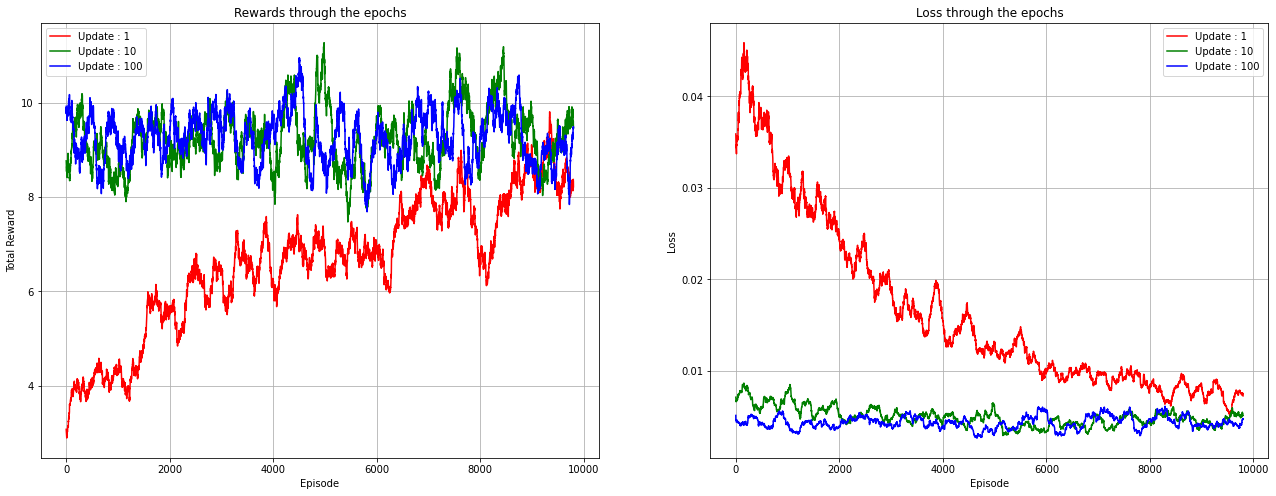

In [50]:
plot_reward_loss_update(**param_time)

## 1.  Linear model and gamma = 0

In [51]:
# Parameters for the deep Q learning algorithm
param_deep_Q = {
    'env' : env,\
    'state_dim' : None ,\
    'name_conversion_state' : None,\
    'mem_size': 100,\
    'gamma' : 0 ,\
    'epsilon' : 0.1,\
    'learning_rate' : 1e-4,\
    'max_iter' : 10 , \
    'batch_size' : 10 ,
    'name' : 'test_model',\
    'model' : None,\
    'constraints' : False,
    'optimizer' : 'Adam',
    'update_target' : 20
}


In [52]:
with open('./check/dic_linear_dq_0.pickle', 'rb') as f:
    dic_linear_dq_0 = pickle.load(f)

In [53]:
param_plot = {
    'dic' : dic_linear_dq_0,
    'names' : names,
    "rm_rew" : 500, 
    'rm_loss' : 500,
    'gamma' : 0,
    'q_learn' : running_mean(all_reward_q10,500)[:10000]
}


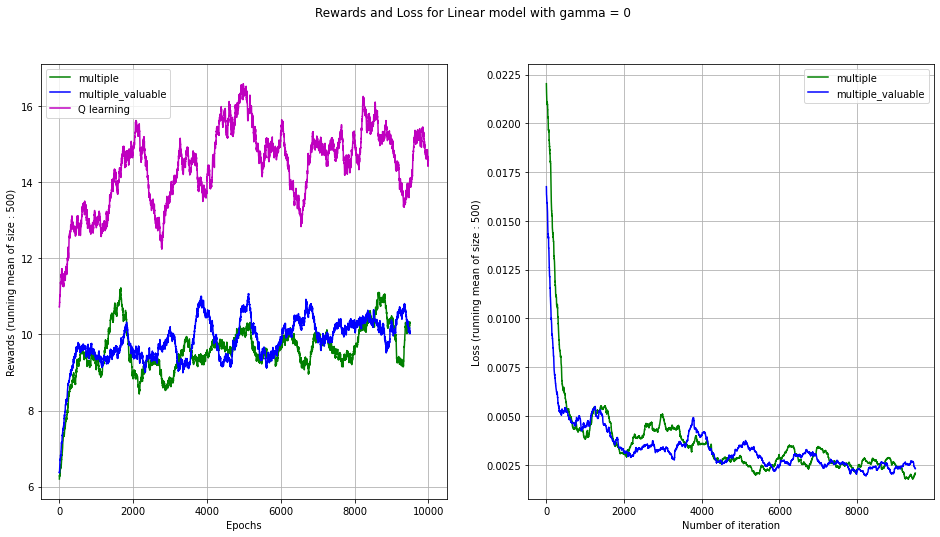

In [54]:
plot_results_loss_rew_dic(**param_plot)

In [55]:
param_q_table = {
     'dic' : dic_linear_dq_0,
    "names" : names,
    "gamma" : 0,
    'isLinear' : True,
    "tranpose" : True
}

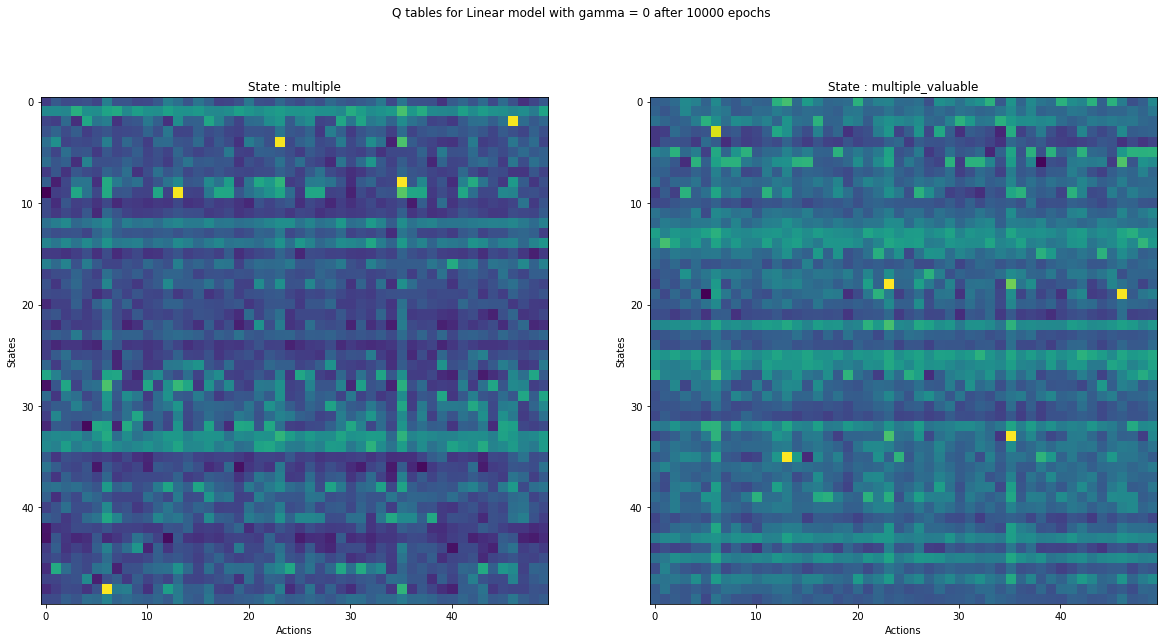

In [56]:
compare_q_tables_dic(**param_q_table) 

## 2. Linear model and gamma = 0.9

In [57]:
# Parameters for the deep Q learning algorithm
param_deep_Q = {
    'env' : env,\
    'state_dim' : None ,\
    'name_conversion_state' : None,\
    'mem_size': 100,\
    'gamma' : 0.9 ,\
    'epsilon' : 0.1,\
    'learning_rate' : 1e-4,\
    'max_iter' : 10 , \
    'batch_size' : 10 ,
    'name' : 'test_model',\
    'model' : None,\
    'constraints' : False,
    'optimizer' : 'Adam',
    'update_target' : 20
}


In [58]:
with open('./check/dic_linear_dq_09.pickle', 'rb') as f:
    dic_linear_dq_09 = pickle.load(f)

In [59]:
param_plot = {
    'dic' : dic_linear_dq_09,
    'names' : names,
    "rm_rew" : 500, 
    'rm_loss' : 500,
    'gamma' : 0,
    'q_learn' : running_mean(all_reward_q109,500)[:10000]
}


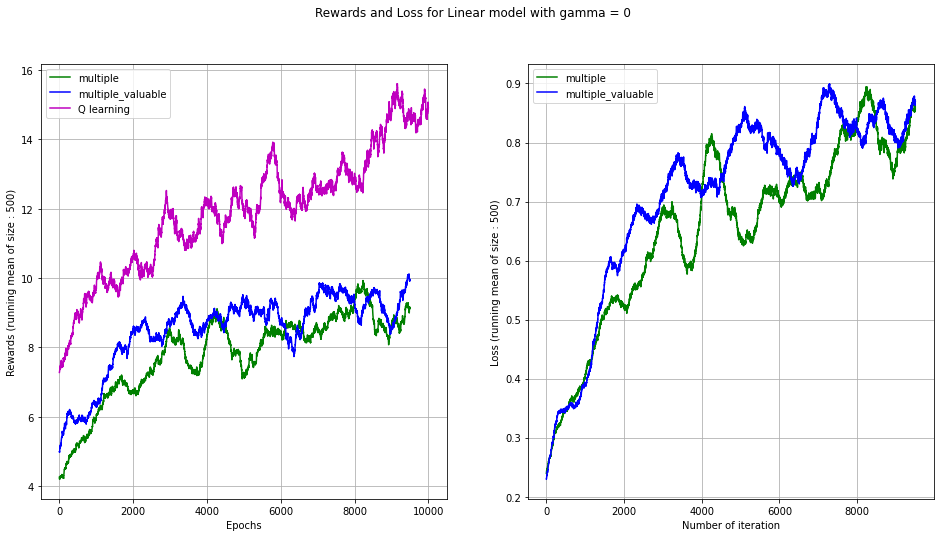

In [60]:
plot_results_loss_rew_dic(**param_plot)

In [61]:
param_q_table = {
     'dic' : dic_linear_dq_09,
    "names" : names,
    "gamma" : 0.9,
    'isLinear' : True,
    "tranpose" : True
}

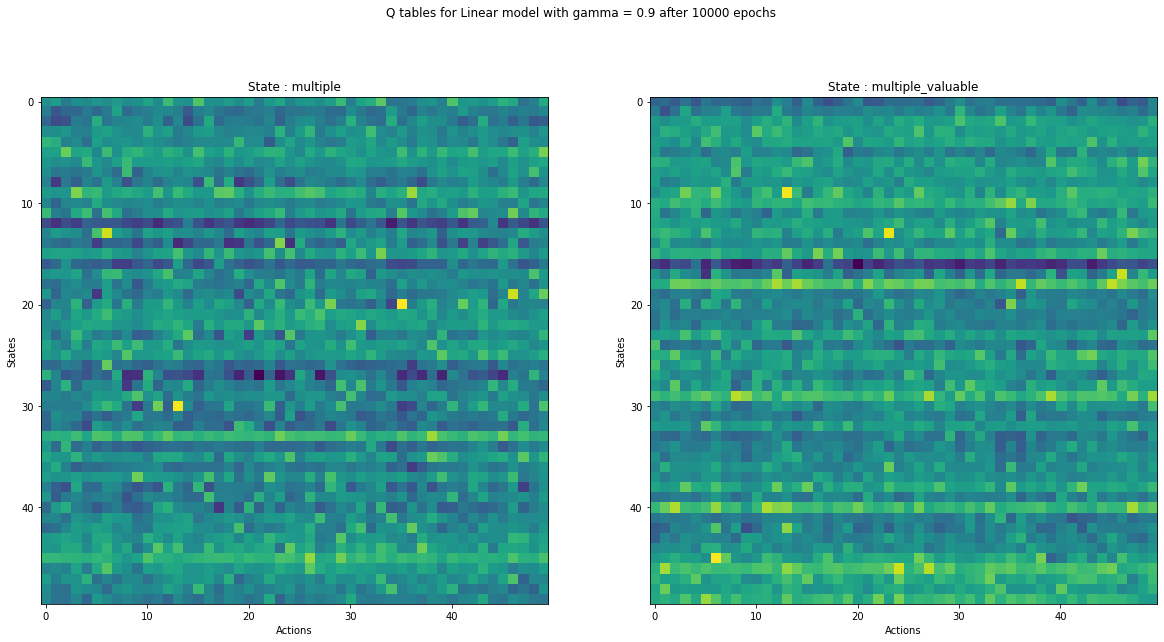

In [62]:
compare_q_tables_dic(**param_q_table) 

## 3. Full connected model and gamma = 0

In [63]:
# Parameters for the deep Q learning algorithm
param_deep_Q = {
    'env' : env,\
    'state_dim' : None ,\
    'name_conversion_state' : None,\
    'mem_size': 200,\
    'gamma' : 0 ,\
    'epsilon' : 0.1,\
    'learning_rate' : 1e-5,\
    'max_iter' : 10 , \
    'batch_size' : 10 ,
    'name' : 'test_model',\
    'model' : None,\
    'constraints' : False,
    'optimizer' : 'Adam',
    'update_target' : 50
}


In [64]:
with open('./check/dic_linear_dq_0.pickle', 'rb') as f:
    dic_linear_dq_0 = pickle.load(f)

In [65]:
param_plot = {
    'dic' : dic_linear_dq_0,
    'names' : names,
    "rm_rew" : 500, 
    'rm_loss' : 500,
    'gamma' : 0,
    'q_learn' : running_mean(all_reward_q10,500)[:10000]
}


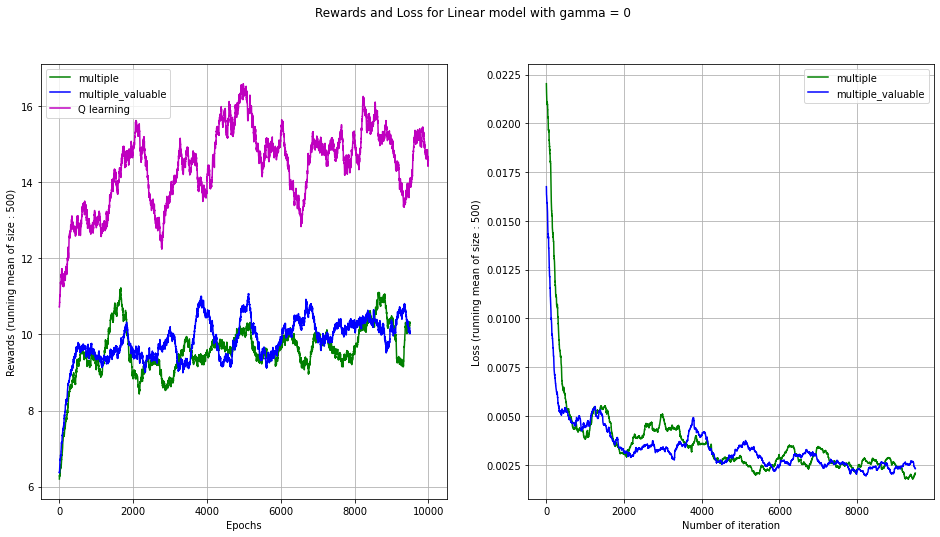

In [66]:
plot_results_loss_rew_dic(**param_plot)

In [67]:
param_q_table = {
     'dic' : dic_linear_dq_09,
    "names" : names,
    "gamma" : 0,
    'isLinear' : False,
    "tranpose" : True
}

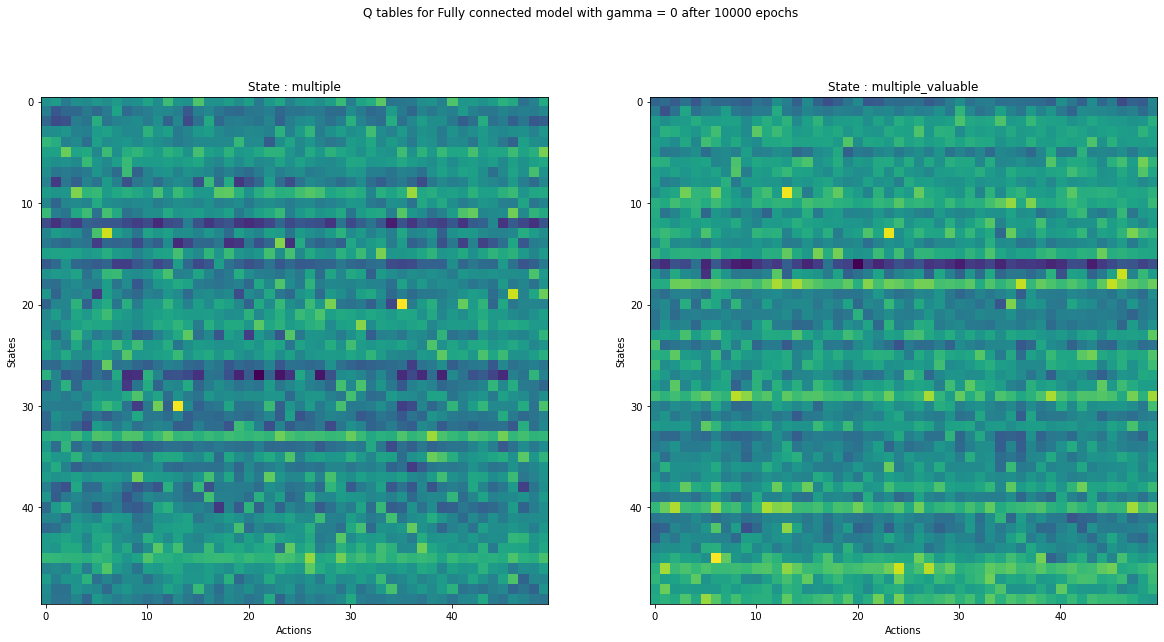

In [68]:
compare_q_tables_dic(**param_q_table) 

## 4. Full connected model and gamma = 0.9

In [69]:
# Parameters for the deep Q learning algorithm
param_deep_Q = {
    'env' : env,\
    'state_dim' : None ,\
    'name_conversion_state' : None,\
    'mem_size': 200,\
    'gamma' : 0.9 ,\
    'epsilon' : 0.1,\
    'learning_rate' : 1e-5,\
    'max_iter' : 10 , \
    'batch_size' : 10 ,
    'name' : 'test_model',\
    'model' : None,\
    'constraints' : False,
    'optimizer' : 'Adam',
    'update_target' : 50
}


In [70]:
with open('./check/dic_fc_dq_09.pickle', 'rb') as f:
    dic_fc_dq_09 = pickle.load(f)

In [71]:
param_plot = {
    'dic' : dic_fc_dq_09,
    'names' : names,
    "rm_rew" : 500, 
    'rm_loss' : 500,
    'gamma' : 0,
    'q_learn' : running_mean(all_reward_q109,500)[:10000]
}


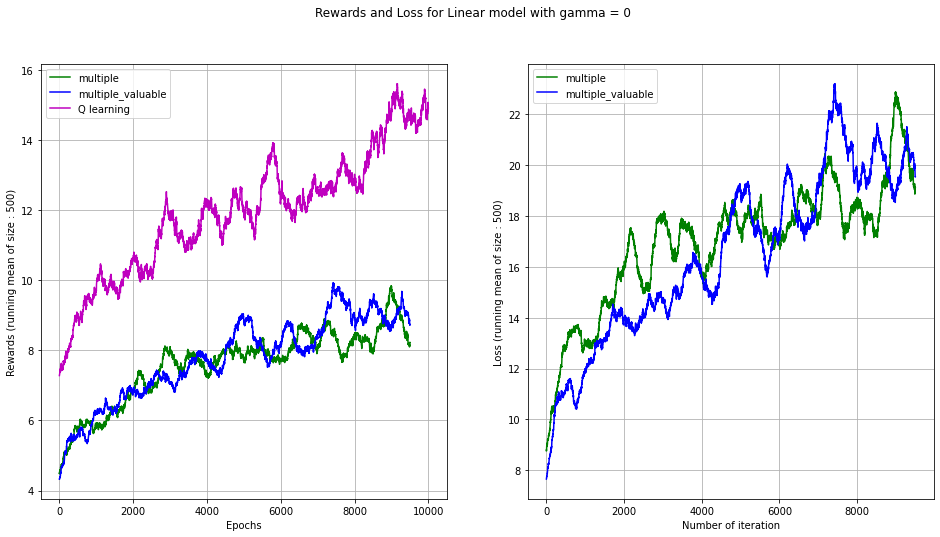

In [72]:
plot_results_loss_rew_dic(**param_plot)

In [73]:
param_q_table = {
     'dic' : dic_fc_dq_09,
    "names" : names,
    "gamma" : 0.9,
    'isLinear' : False,
    "tranpose" : True
}

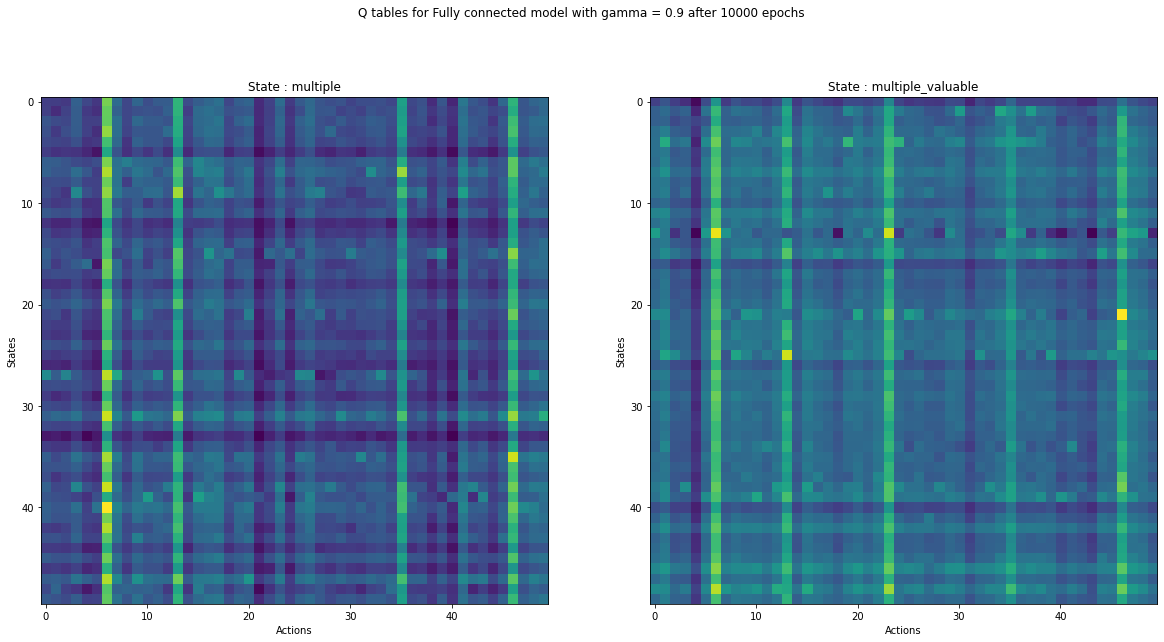

In [74]:
compare_q_tables_dic(**param_q_table) 

# Comparison Deep Q learning and Double Q learning 

## Gamma = 0 and Rewards, multiple and multiple_valuable

In [76]:
# Parameters for the deep Q learning algorithm
param_deep_Q = {
    'env' : env,\
    'state_dim' : None ,\
    'name_conversion_state' : None,\
    'mem_size': 200,\
    'gamma' : 0 ,\
    'epsilon' : 0.1,\
    'learning_rate' : 1e-5,\
    'max_iter' : 10 , \
    'batch_size' : 10 ,
    'name' : 'test_model',\
    'model' : None,\
    'constraints' : False,
    'optimizer' : 'Adam',
    'update_target' : 50
}


In [77]:
dic_fc_dqn_0 = {}
epochs = [10000]
names = ['multiple_valuable','multiple','rewards']

In [78]:
with open('./check/dic_fc_dq_3_0.pickle', 'rb') as f:
    dic_fc_dqn_0 = pickle.load(f)

In [79]:
param_plot = {
    'dic' : dic_fc_dqn_0,
    'names' : names,
    "rm_rew" : 500, 
    'rm_loss' : 500,
    'gamma' : 0,
    'q_learn' : running_mean(all_reward_q10,500)[:10000]
}


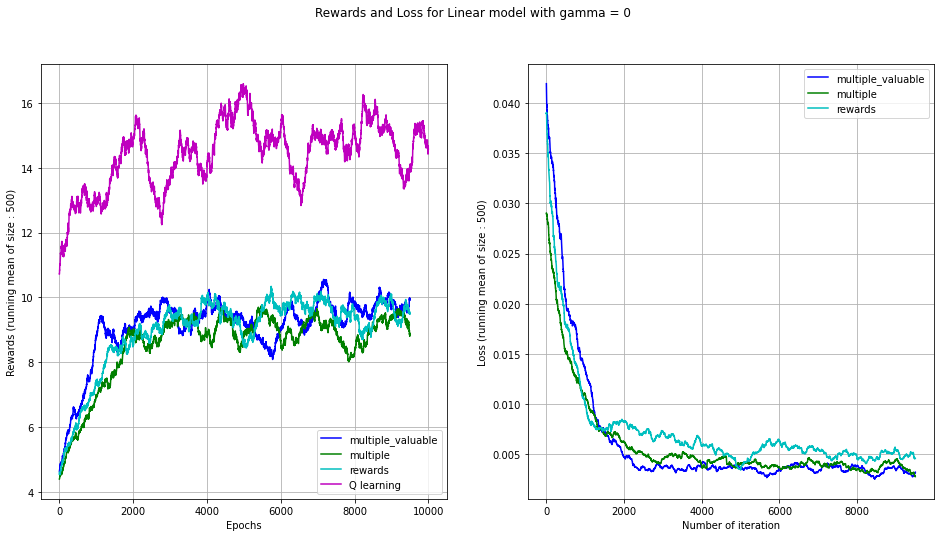

In [80]:
plot_results_loss_rew_dic(**param_plot)

In [90]:
param_q_table = {
     'dic' : dic_fc_dqn_0,
    "names" : names,
    "gamma" : 0,
    'isLinear' : False,
    "tranpose" : True
}

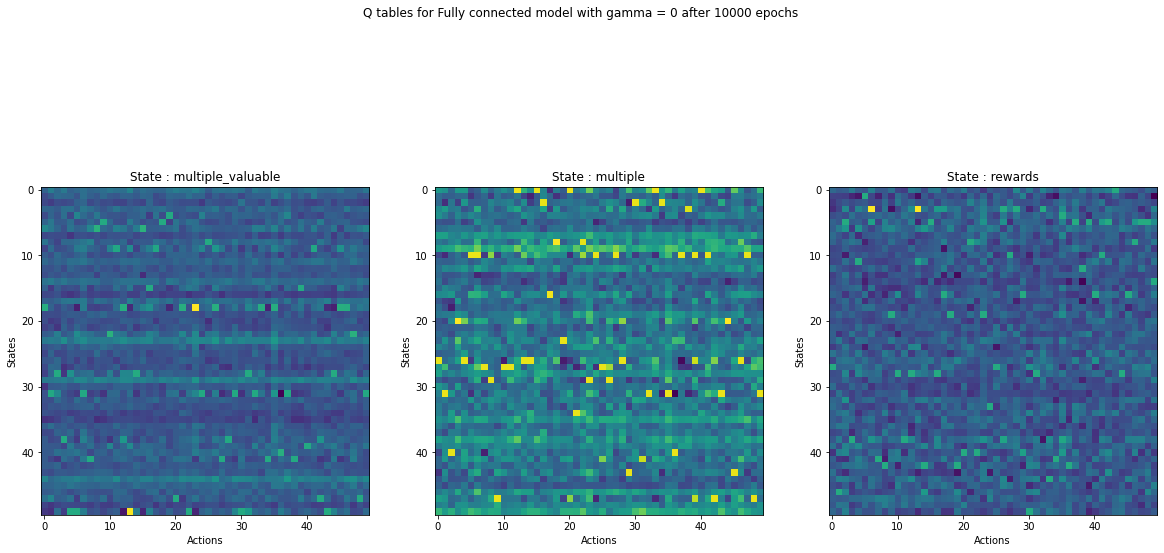

In [91]:
compare_q_tables_dic(**param_q_table) 

## Gamma = 0.9 and Rewards, multiple and multiple_valuable

In [83]:
# Parameters for the deep Q learning algorithm
param_deep_Q = {
    'env' : env,\
    'state_dim' : None ,\
    'name_conversion_state' : None,\
    'mem_size': 200,\
    'gamma' : 0.9 ,\
    'epsilon' : 0.1,\
    'learning_rate' : 1e-5,\
    'max_iter' : 10 , \
    'batch_size' : 10 ,
    'name' : 'test_model',\
    'model' : None,\
    'constraints' : False,
    'optimizer' : 'Adam',
    'update_target' : 50
}


In [84]:
dic_fc_dqn = {}
epochs = [20000]
names = ['multiple_valuable','multiple','rewards']

In [85]:
with open('./check/dic_fc_dq_20000_09.pickle', 'rb') as f:
    dic_fc_dqn = pickle.load(f)

In [86]:
param_plot = {
    'dic' : dic_fc_dqn,
    'names' : names,
    "rm_rew" : 500, 
    'rm_loss' : 500,
    'gamma' : 0.9,
    'q_learn' : running_mean(all_reward_q109,500)[:20000]
}


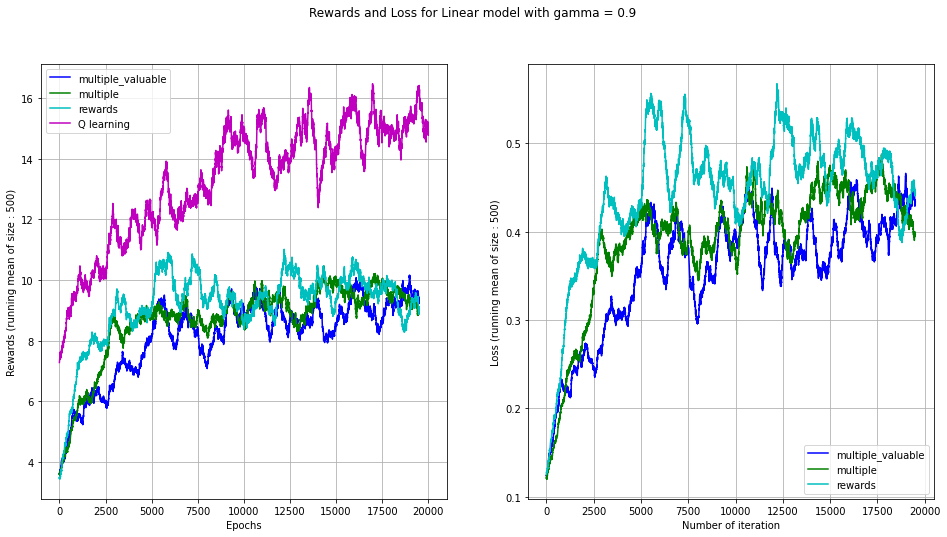

In [87]:
plot_results_loss_rew_dic(**param_plot)

In [150]:
param_q_table = {
     'dic' : dic_fc_dqn,
    "names" : names,
    "gamma" : 0.9,
    'isLinear' : False,
    "tranpose" : True
}

In [232]:
dic_fc_dqn[names[2]][0][-1].detach().numpy().T[0]

array([3.4629626, 4.8309007, 4.1930413, 4.0903726, 3.705266 , 4.856864 ,
       6.694466 , 3.4804957, 3.499452 , 4.6913457, 4.780734 , 3.110731 ,
       4.600183 , 5.9345675, 5.0485654, 5.0135694, 5.101049 , 4.0397506,
       3.7607284, 4.574926 , 5.3541245, 4.726117 , 4.791147 , 6.552798 ,
       6.1058946, 3.6225014, 3.3112404, 5.140614 , 3.9829311, 5.35072  ,
       4.8477015, 5.2093763, 3.906746 , 4.882484 , 4.4762664, 7.733233 ,
       5.0428157, 3.8334222, 4.909204 , 3.855922 , 5.5979476, 4.759867 ,
       3.363894 , 4.8209853, 4.490176 , 5.4839635, 6.538446 , 4.4393973,
       3.2990484, 3.6921482], dtype=float32)

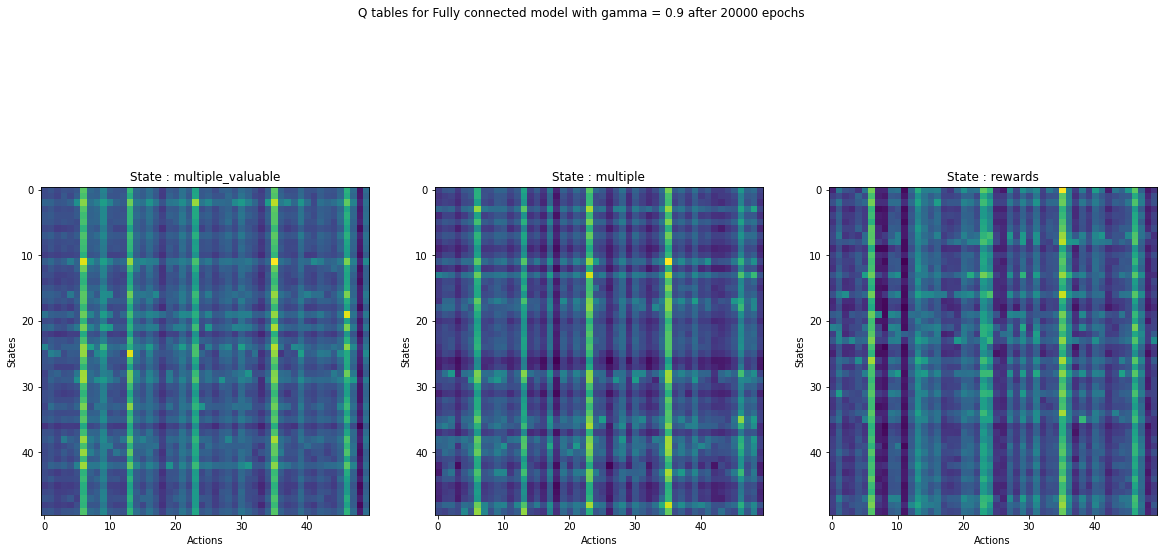

In [151]:
compare_q_tables_dic(**param_q_table) 

# Catalogue size of 1000 

In [233]:
# Parameters for the deep Q learning algorithm
param_deep_Q = {
    'env' : env,\
    'state_dim' : None ,\
    'name_conversion_state' : None,\
    'mem_size': 1000,\
    'gamma' : 0 ,\
    'epsilon' : 0.1,\
    'learning_rate' : 1e-5,\
    'max_iter' : 10 , \
    'batch_size' : 10 ,
    'name' : 'test_model',\
    'model' : None,\
    'constraints' : False,
    'optimizer' : 'Adam',
    'update_target' : 50
}


In [234]:
with open('./check/high_dimension.pickle', 'rb') as f:
    dic_high = pickle.load(f)

In [238]:
with open('./check/env_high.pickle', 'rb') as f:
    env = pickle.load(f)

In [239]:
with open('./check/reward_high_q_learning.pickle', 'rb') as f:
    reward_q_high = pickle.load(f)

In [240]:
param_plot = {
    'dic' : dic_high,
    'names' : names,
    "rm_rew" : 500, 
    'rm_loss' : 500,
    'gamma' : 0,
    'q_learn' : running_mean(reward_q_high,500)
}


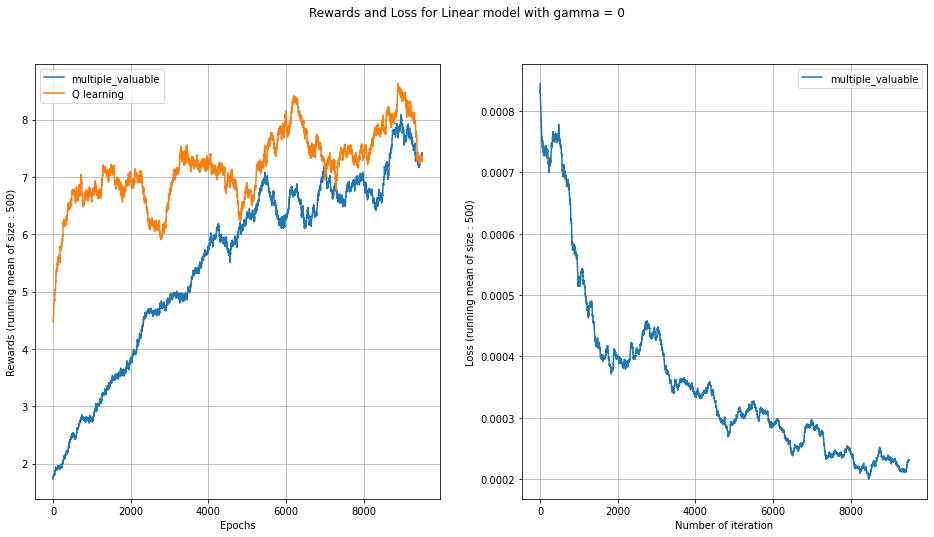

In [241]:
plot_results_loss_rew_dic(**param_plot)